In [671]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [672]:
# df = pd.read_csv('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 2/Data/automobile_data.csv')
df = pd.read_csv('/workspaces/DJS-compute-tasks/Task 2/Data/automobile_data.csv')

In [673]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [674]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [675]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [676]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [677]:
columns = [column for column in df]

In [678]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [679]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [680]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


**Here the '?' signifies null values which need to be managed.**

In [681]:
df.shape

(205, 26)

In [682]:
df.replace('?', np.nan, inplace=True)

In [683]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [684]:
columns_checking = ['normalized-losses','num-of-doors','bore','stroke','horsepower','peak-rpm','price']

def null_pecentage(df, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df[col].isnull().sum() / len(df)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")
    

normalized-losses: 20.0%
num-of-doors: 0.98%
bore: 1.95%
stroke: 1.95%
horsepower: 0.98%
peak-rpm: 0.98%
price: 1.95%


**Here the null percentage for rows of columns other than normalized-losses are very low, so the rows can be dropped safely**

In [685]:
df.dropna(subset = ['num-of-doors','bore','stroke','horsepower','peak-rpm','price'], inplace=True)

In [686]:
df.isnull().sum()

symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [687]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [688]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,193.000000,159.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,121.132075,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565
std,1.235582,35.651285,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000
50%,1.000000,113.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000
75%,2.000000,148.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [689]:
list = [df['normalized-losses'].mean(), df['normalized-losses'].median(), df['normalized-losses'].mode()]
list

[np.float64(121.13207547169812),
 np.float64(113.0),
 0    161.0
 Name: normalized-losses, dtype: float64]

In [690]:
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())

In [691]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [692]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [693]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121.132075,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [694]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [695]:
df['num-of-doors']=df['num-of-doors'].map({'two' : 2, 'four' : 4})

In [696]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [697]:
df['num-of-cylinders']=df['num-of-cylinders'].map({'six' : 6, 'four' : 4, 'five' :5, 'three':3,'twelve':12,'eight': 8})

In [698]:
df[['bore','stroke','horsepower','peak-rpm','price','num-of-doors','num-of-cylinders']] = df[['bore','stroke','horsepower','peak-rpm','price','num-of-doors','num-of-cylinders']].astype(float)

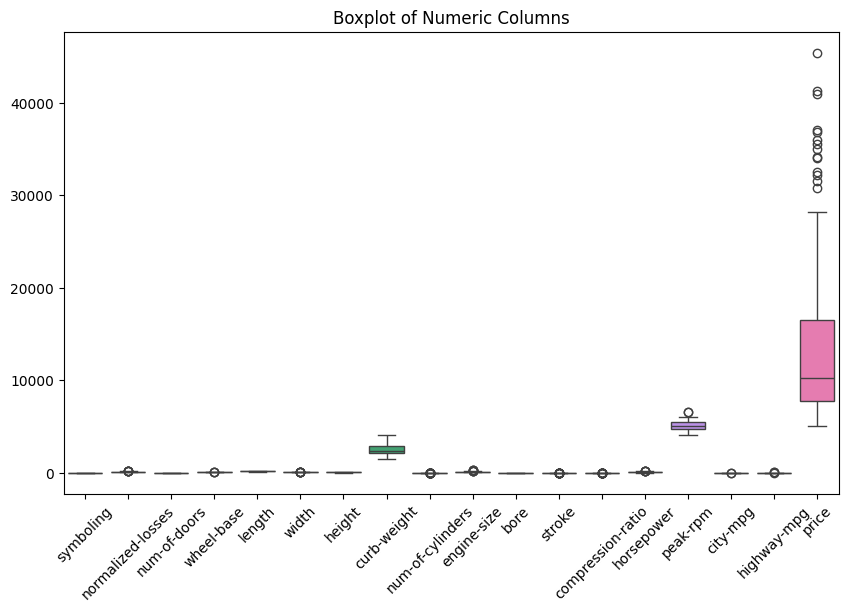

In [699]:

numeric_columns = df.select_dtypes(include=[float, int]).columns

# Create a boxplot for all numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])

# Customize plot
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.show()


In [700]:
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

upper_bound = Q3 + 1.5 * IQR

df['price'] = df['price'].apply(lambda x: min(x, upper_bound))

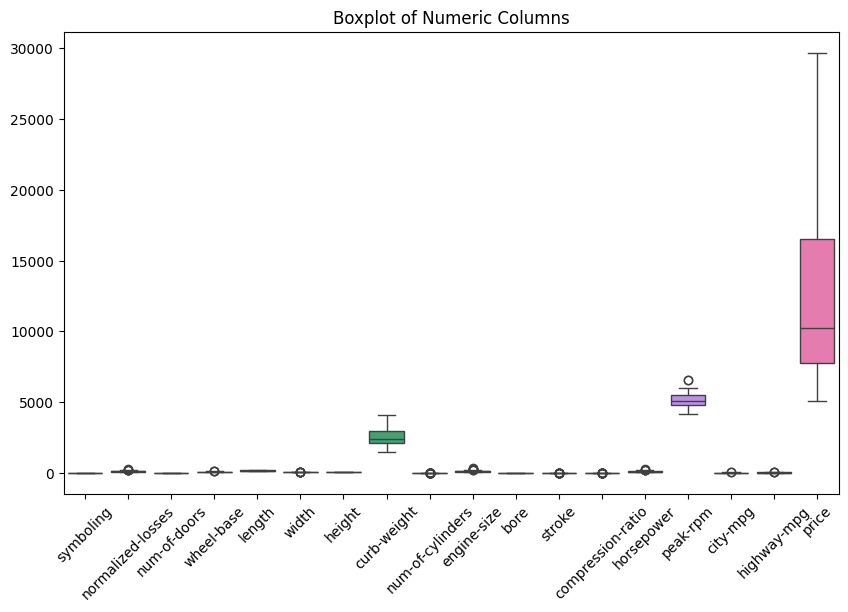

In [701]:

numeric_columns = df.select_dtypes(include=[float, int]).columns

# Create a boxplot for all numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])

# Customize plot
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.show()


In [702]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders     float64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [703]:
nonnumeric = ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']

**Using OneHot encoder to encode all the non numeric values before using PCA**

In [704]:
from sklearn.preprocessing import OneHotEncoder

In [705]:
encoder = OneHotEncoder(sparse_output=False)

In [706]:
encoded_data = encoder.fit_transform(df[nonnumeric])

In [707]:
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(nonnumeric))

In [708]:
df_encoded.shape

(193, 47)

In [709]:
df.shape

(193, 26)

In [710]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [711]:
df_encoded.isnull().sum()

make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot               0
make_plymouth             0
make_porsche              0
make_saab                 0
make_subaru               0
make_toyota               0
make_volkswagen           0
make_volvo                0
fuel-type_diesel          0
fuel-type_gas             0
aspiration_std            0
aspiration_turbo          0
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
drive-wheels_4wd          0
drive-wheels_fwd          0
drive-wheels_rwd          0
engine-location_front     0
engine-location_rear      0
engine-type_dohc    

In [712]:
df_combined = pd.concat([df.drop(columns=nonnumeric), df_encoded], axis=1)
df_combined.isnull().sum()

symboling                 12
normalized-losses         12
num-of-doors              12
wheel-base                12
length                    12
width                     12
height                    12
curb-weight               12
num-of-cylinders          12
engine-size               12
bore                      12
stroke                    12
compression-ratio         12
horsepower                12
peak-rpm                  12
city-mpg                  12
highway-mpg               12
price                     12
make_alfa-romero          12
make_audi                 12
make_bmw                  12
make_chevrolet            12
make_dodge                12
make_honda                12
make_isuzu                12
make_jaguar               12
make_mazda                12
make_mercedes-benz        12
make_mercury              12
make_mitsubishi           12
make_nissan               12
make_peugot               12
make_plymouth             12
make_porsche              12
make_saab     

**Doubt: Before combining both dfs had no null values so why null values now??**

In [713]:
df_combined.dropna(inplace=True)

In [714]:
df_combined = df_combined.reset_index()

In [715]:
df_combined = df_combined.drop('index',axis=1)

In [716]:
df_combined.to_csv('final_data.csv', index=False)

In [717]:
df_combined.shape

(181, 65)

In [718]:
from sklearn.preprocessing import scale 
X = df_combined.drop(['price'], axis=1)
y = (df_combined['price'])

In [719]:
from sklearn.model_selection import RepeatedKFold

pca = PCA(n_components=0.96)
X_reduced = pca.fit_transform(scale(X))

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LinearRegression()


In [720]:
column_names = [f'PC{i+1}' for i in range(X_reduced.shape[1])]
X_reduced_train_df = pd.DataFrame(X_reduced, columns=column_names)
X_reduced_train_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
0,-1.280216,3.139092,4.128598,-0.529767,3.411435,0.163525,2.091482,5.825361,-0.551841,-3.713721,-0.385694,-0.597636,2.542801,-0.786219,5.067285,0.510202,0.977269,1.519044,-0.592493,0.522666,0.986964,-0.250452,0.645880,-1.500796,-0.833346,0.788533,0.910530,0.640952,-0.164609,-0.000551,0.283575,0.380623,0.883004,-0.228952,-0.323391
1,-1.280216,3.139092,4.128598,-0.529767,3.411435,0.163525,2.091482,5.825361,-0.551841,-3.713721,-0.385694,-0.597636,2.542801,-0.786219,5.067285,0.510202,0.977269,1.519044,-0.592493,0.522666,0.986964,-0.250452,0.645880,-1.500796,-0.833346,0.788533,0.910530,0.640952,-0.164609,-0.000551,0.283575,0.380623,0.883004,-0.228952,-0.323391
2,0.251276,1.748188,2.644025,0.043815,3.207775,1.519474,0.137628,2.977579,0.508527,-0.820359,0.267468,3.104183,1.469651,0.689675,2.689082,2.137973,1.661422,1.429990,-1.468274,0.936133,0.061471,-0.603329,-0.504998,1.734172,-0.363634,1.494443,1.719863,0.036774,0.430977,-2.253610,1.640652,3.190932,-0.747340,1.746424,-1.114921
3,-0.166347,-0.495784,0.380531,0.036366,1.358135,1.142018,0.216329,-3.109615,-1.488958,-0.674048,-0.233443,-0.743449,-0.994468,-1.941161,0.617696,1.623785,-0.877902,-0.295824,0.600762,1.902798,2.483408,0.857420,-0.096905,1.125358,-0.137839,0.979722,-0.281919,0.285899,-0.479369,0.657853,-0.483184,-0.185368,0.321591,0.649741,-0.396884
4,1.410241,0.100848,1.877197,-0.352777,1.522584,-0.316695,-0.330846,-3.836330,-1.241600,-1.295705,0.560752,-0.970539,-0.984395,-1.202215,0.441070,2.205317,-0.468445,-0.296836,0.781689,1.636867,3.380688,0.847778,0.053337,0.504006,-0.371006,1.093128,-1.616115,1.200273,2.458013,-0.555371,1.108388,0.421299,-1.027981,0.234934,0.651026


In [721]:
X.head(5)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,121.132075,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,121.132075,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,121.132075,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,164.000000,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,164.000000,4.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [722]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([13.4 , 21.2 , 28.33, 34.31, 39.14, 43.51, 47.32, 51.03, 54.31,
       57.49, 60.42, 63.23, 65.76, 68.19, 70.35, 72.44, 74.48, 76.41,
       78.29, 80.06, 81.72, 83.35, 84.9 , 86.37, 87.69, 88.91, 90.07,
       91.17, 92.15, 93.06, 93.93, 94.65, 95.28, 95.87, 96.42])

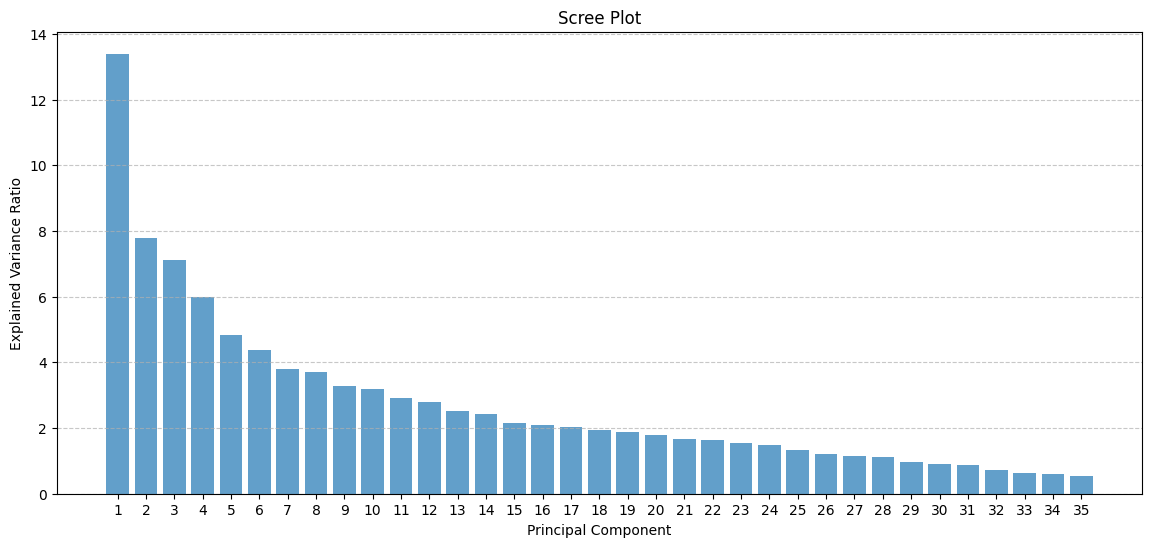

In [723]:
explained_variance = pca.explained_variance_ratio_*100

plt.figure(figsize=(14, 6))
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [724]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) 

In [725]:
mses = []
for i in range(1,37):
    X_reduced_train = pca.fit_transform(scale(X_train))[:,:i]
    X_reduced_test = pca.transform(scale(X_test))[:,:i] 
    model.fit(X_reduced_train, y_train)
    pred = model.predict(X_reduced_test)
    mses.append(mean_squared_error(y_test, pred))
print(len(mses))
for i in range(1,36):
    print(f'{i} : {np.sqrt(mses[i])}')

36
1 : 3006.2461235949286
2 : 3072.1736605068363
3 : 3078.295958908956
4 : 3032.7936954589472
5 : 2905.1401099362884
6 : 2867.0641499506164
7 : 3002.6348775156484
8 : 2974.5533306200587
9 : 3018.9970935240444
10 : 2970.601561463381
11 : 2973.9541230739337
12 : 2893.8826157294866
13 : 3140.8845298588562
14 : 3130.7674742815966
15 : 3149.9784521362562
16 : 3267.577348619776
17 : 3363.529658119425
18 : 3334.705180863632
19 : 3341.285381402464
20 : 3409.617856144518
21 : 3373.525635329184
22 : 3305.550587753852
23 : 3310.4021203199572
24 : 3266.563611519833
25 : 3225.216068237546
26 : 3300.9429797506364
27 : 3299.839952363849
28 : 3405.789579565688
29 : 3419.4203458742854
30 : 3397.302318319611
31 : 3408.1465865648534
32 : 3453.508932204501
33 : 3436.440128059463
34 : 3436.440128059463
35 : 3436.440128059463


In [726]:
rmses = [np.sqrt(mse) for mse in mses]

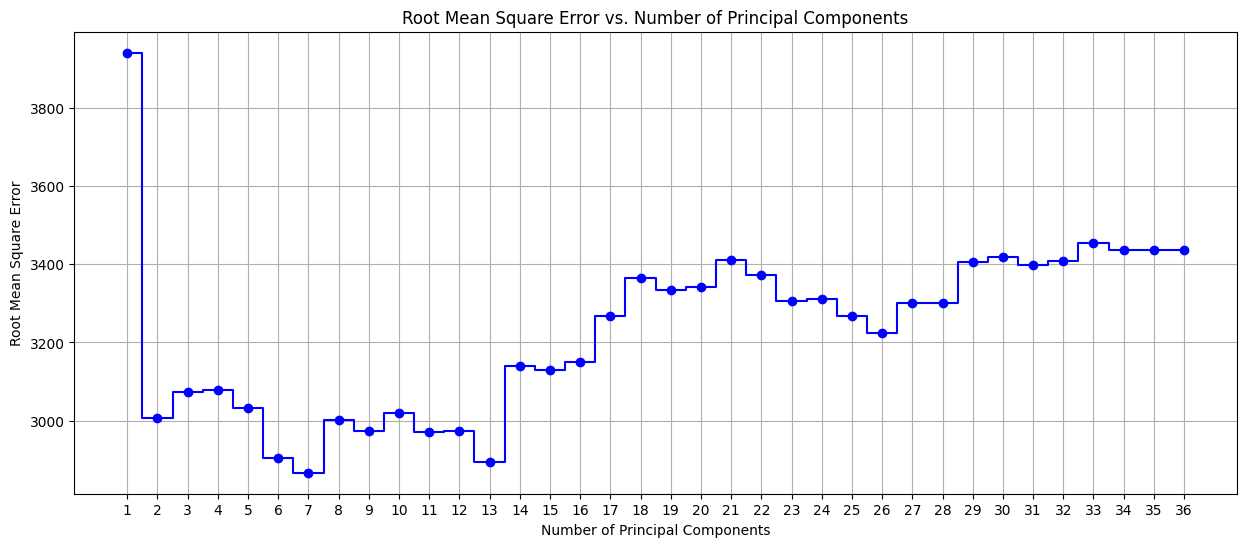

In [727]:
plt.figure(figsize=(15, 6))
#Searched for cooler seaborn.lineplot and i found this lol
plt.step(range(1, 37), rmses, where='mid', color='b', linestyle='-', marker='o')
plt.title('Root Mean Square Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Root Mean Square Error')
plt.grid(True)
plt.xticks(range(1, 37))
plt.show()


In [728]:
X_reduced_train = pca.fit_transform(scale(X_train))[:,:25]
X_reduced_test = pca.transform(scale(X_test))[:,:25] 

In [729]:
model.fit(X_reduced_train, y_train)

LinearRegression()

In [730]:
# pred = model.predict(X_reduced_test)

In [731]:
# mse = mean_squared_error(y_test, pred)
# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {np.sqrt(mse)}')

In [732]:
# mean_pred = y_train.mean()
# baseline_mse = mean_squared_error(y_test, [mean_pred] * len(y_test))
# print(f"Baseline MSE (mean predictor): {baseline_mse}")

In [733]:
# mse

In [734]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Assuming y_test contains the actual values and pred contains the predicted values
mae = mean_absolute_error(y_test, pred)

print(f"Mean Absolute Error: {mae}")
y_train_pred = model.predict(X_reduced_train)
y_test_pred = model.predict(X_reduced_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Training Mean Squared Error: {train_mse}")
print(f"Training Root Mean Squared Error: {np.sqrt(train_mse)}")
print(f"Testing Root Mean Squared Error: {np.sqrt(test_mse)}")


Mean Absolute Error: 2477.90802859636
Training Mean Squared Error: 4075000.9630620372
Training Root Mean Squared Error: 2018.663162358207
Testing Root Mean Squared Error: 3266.563611519833


In [735]:
mean_pred = y_train.mean()
baseline_mse = mean_squared_error(y_test, [mean_pred] * len(y_test))
print(f"Baseline MSE (mean predictor): {baseline_mse}")


Baseline MSE (mean predictor): 54309086.224642456


In [736]:
print(np.sqrt(train_mse) / df_combined['price'].mean())
print(np.sqrt(test_mse) / df_combined['price'].mean())

0.16131387872247774
0.2610351524185909


In [737]:
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (test): {r2}")
r2 = r2_score(y_train, y_train_pred)
print(f"R-squared (train): {r2}")

R-squared (test): 0.8009941254047344
R-squared (train): 0.9073844010745276
